# Jacky Ho
## Group 50
---
For our Final Project, we decided to research which Pittsburgh neighborhood is the best to survive the Purge, the fictitious event from the cinematic franchise "The Purge." 
Essentially, it is a 12 hour event in the United States from 7:00pm to 7:00am where all crime is legal and emergency services (such as ambulances, police and the fire department). Additionally:
- Sirens blare throughout the land to signal the start and end of The Purge.
- All police, fire, and emergency medical services are suspended for the duration of the Purge.
- The president, first family, and government officials of rank 10, are granted immunity from the Purge, meaning that they must not be harmed. (This was revoked in Election Year to permit the murder of a political opponent).
- Only Class 1–4 weaponry is permitted, while Class 5 weaponry (such as explosives) is prohibited.
- Violations of any Purge rules will result in public execution.
And since Pittsburgh is in the United States, our inquiry is which Pittsburghs neighborhood is the best to survive the Purge in?

The data set I will be using to reach an answer is:
https://data.wprdc.org/dataset/city-of-pittsburgh-facilities
This data set lists out all of Pittsburgh's facilities owned by the city.

My metric for determining the "best" neighborhood will be
- Which neighborhood have the most useful facilities that can help an individual during the Purge, either by surviving in hiding, surviving by being prepared or surviving by being protected.

To begin this search, I must first determine what type of city facilities exists.

---

This is the code for importing the necessary python packages for my code, as well as initializing a dataframe from the data set that I will be looking at.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
file_path = "Final Project/fbb50b02-2879-47cd-abea-ae697ec05170.csv"
data = pd.read_csv("fbb50b02-2879-47cd-abea-ae697ec05170.csv")

Below is the code used to get a list of all the possible classifications of a city facility type, sorted alphabetically for convinience.

In [9]:
def get_facility_types(df, column_name):
    facility_type_list=[]
    for index, row in df.iterrows():
        facility_type = row[column_name]
        if facility_type not in facility_type_list:
            facility_type_list.append(facility_type)
        facility_type_list.sort()
    return facility_type_list
get_facility_types(data,"type")

['Activity',
 'Cabin',
 'Community',
 'Concession',
 'Dugout',
 'Firehouse',
 'Medic Station',
 'OFFICE',
 'Office',
 'POLICE',
 'Police',
 'Pool',
 'Pool Closed',
 'Pool/Rec',
 'Rec Center',
 'Recycling',
 'Restrooms',
 'SERVICE',
 'STORAGE',
 'Salt Dome',
 'Senior',
 'Service',
 'Shelter',
 'Storage',
 'TRAINING',
 'Training',
 'Utility',
 'Vacant']

Below is code to determine how many types of classifications are there

In [53]:
print(len(get_facility_types(data, "type")))

28


Now that we know what type of facilities are out there, we must determine which of them are useful for a survivor during the Purge; in other words, which facilities are the safest, in the sense of which facilities will be less likely to be visited by other people during the purge, or protect them from the outside throughout the night.

Essentially, we will be adding weight assignation to each of the types:

|Score|Safety rating|
|---|---|
|0|Absolutely not safe at all|
|1|Depends, can be safe|
|2|Mostly safe|
|3| Absolute safest|

This metric is mostly ambiguous but my reasoning is based on common sense as much as possible

|Assigned score|Facility type|Reason|
|---|---|---|
|0| Activity|These are essentially facilities where individuals gather for activities. Where there is something to do, there is equipment to be able to do those activities, hence objects that can be stolen.
|1| Cabin|These are abandoned, historical cabins that were purchased by the city to preserve their condition due to their historical significance. The problem is that these are public attractions, which are very accessible to the public, a trait that might still be applied during the Purge. However, they could remain unvisited by others because these types of buildings do not hold or store items of value for thieves to seek.
|1| Community|Community centers are architecturally designed to be as welcoming and open to the public in order to fester a community, which would make it easier for malicious people to breach or attack during the purge. However, if the community that calls this center home is a strong and moral one, they might use the center as a stronghold for community members to hold out by working together. Albeit the later really depends on the community and is not guaranteed, hence the '1' score.
|0| Concession| These are simple food trucks, carts and stands that offer no secure shelter.
|0| Dugout| These are baseball fields, which are known for being open, flat, with not-much cover for people looking to use as shelter.
|3| Firehouse| These are fire departments, which are architecturally guarded against disasters, and secure enough to prevent intruders from stealing their equipment. Therefore, any hooligan looking to burn or throw explosive at the facility will struggle, keeping survivors inside secure.
|3| Medic Station|According to The Purge TV show, there is lore that indicates medical staff at such facilities sign waivers that waive their right to participate in the Purge, therefore any survivor looking to take shelter will not have to fear being attacked by the medical staff, however a lot of medical stations employ security forces, which might or might not let you in. It is generally a safe bet to find yourself in a medical station in the purge.
|0| Office OFFICE| These are simple white-collar offices, offering no protection, and might be targeted by rival corporations to steal trade-secrets and the like.
|3| Police/POLICE| Same reasons as a firestation, but they also have an armory, with which a survivor can arm themselves for self-defence.
|0| Pool/Pool Closed| Swimming pools offer no protection.
|0| Pool/Rec| Recreation swimming pools offer no protection and might be ransacted for recreational equipment.
|0| Rec Center| Recreational centers have the same reason as Activity type facilities.
|3| Recycling| Recycling facilities are actually goated to hide during the Purge because no-one would think to raid a recycling facility because there usually isn't anything of value stored inside.
|1| Restrooms| Public bathrooms are relatively unsafe because even malicious people might require a bathroom stop during the purge, however, some restrooms are rated to be disaster-proof, which might be safe if you can find one.
|2| Salt Dome| These are storage facilities for the saltpepper used to defrost roads during winter. Relatively safe because won't raid a storage facility for salt, however, can still be attacked for the special-purpose vehicles used to salt the roads.
|1| Senior| These are housing where elders reside or retire to. From one perspective, old people are not as harmless, however, these facilities aren't necessarily secure.
|2| Service/SERVICE| These are offices and storage facilities for equipment the city uses to service maintenance around the city. Relatively safe if you can hide in a storage facility but some of these store valuable equipment that might be targeted by raids.
|3| Shelter| These are disaster-proof shelters designed to survive most disasters, even nuclear blasts. Such facilities will definitely protect you from all sorts of attacks during the Purge
|2| Storage/STORAGE| Same as service; some storages might store objects no-one wants and some do.
|2| Training/TRAINING| These are training facilities for government workers, which wouldn't be at the top of the list for people to raid during the purge, but can house valuable equipment.
|2| Utility| Same as service
|3| Vacant|Abandoned homes or facilities won't be targeted by people because as a vacant house, there is nothing inside to steal.

Below is a dictionary of each type and their respective weight

In [8]:
weighted_types={'Activity': 0,
                'Cabin': 1,
                'Community': 1,
                'Concession': 0,
                'Dugout': 0,
                'Firehouse': 3,
                'Medic Station': 3,
                'OFFICE': 0,
                'Office': 0,
                'POLICE': 3,
                'Police': 3,
                'Pool': 0,
                'Pool Closed': 0,
                'Pool/Rec': 0,
                'Rec Center': 0,
                'Recycling': 3,
                'Restrooms': 1,
                'SERVICE': 2,
                'STORAGE': 2,
                'Salt Dome': 2,
                'Senior': 1,
                'Service': 2,
                'Shelter': 3,
                'Storage': 2,
                'TRAINING': 2,
                'Training': 2,
                'Utility': 2,
                'Vacant': 3}

The code below creates a list of neighborhoods.

In [10]:
def get_neighborhoods(df, column_name):
    neighborhoods=[]
    for index, row in df.iterrows():
        item = row[column_name]
        if item not in neighborhoods:
            neighborhoods.append(item)
        cleanedList = [x for x in neighborhoods if str(x) != 'nan']
        cleanedList.sort()
    return cleanedList
get_neighborhoods(data,"neighborhood")

['Allegheny Center',
 'Allegheny West',
 'Allentown',
 'Banksville',
 'Bedford Dwellings',
 'Beechview',
 'Beltzhoover',
 'Bloomfield',
 'Bluff',
 'Bon Air',
 'Brighton Heights',
 'Brookline',
 'California-Kirkbride',
 'Carrick',
 'Central Business District',
 'Central Lawrenceville',
 'Central Northside',
 'Central Oakland',
 'Chateau',
 'Crafton Heights',
 'Crawford-Roberts',
 'Duquesne Heights',
 'East Allegheny',
 'East Hills',
 'East Liberty',
 'Elliott',
 'Fairywood',
 'Fineview',
 'Garfield',
 'Glen Hazel',
 'Greenfield',
 'Hays',
 'Hazelwood',
 'Highland Park',
 'Homewood North',
 'Homewood South',
 'Homewood West',
 'Knoxville',
 'Larimer',
 'Lincoln Place',
 'Lincoln-Lemington-Belmar',
 'Lower Lawrenceville',
 'Manchester',
 'Marshall-Shadeland',
 'Middle Hill',
 'Morningside',
 'Mount Washington',
 'North Oakland',
 'Oakwood',
 'Overbrook',
 'Perry North',
 'Perry South',
 'Point Breeze',
 'Point Breeze North',
 'Polish Hill',
 'Regent Square',
 'Shadyside',
 'Sheraden',
 'S

The code below counts how many neighborhoods the data set dealt with

In [56]:
print(len(get_neighborhoods(data,"neighborhood")))

75


The code below can count how many of each type of facility a specified neighborhood has

In [11]:
def get_type_count(df, neighborhood):
    values = {}
    for index, row in df.iterrows():
        if row["neighborhood"] == neighborhood:
            value = row["type"]
            if isinstance(value, str):
                if value not in values:
                    values[value] = 1
                else:
                    values[value] += 1
    return values
get_type_count(data, "Highland Park")

{'Service': 4,
 'Storage': 3,
 'Shelter': 10,
 'Activity': 1,
 'Cabin': 1,
 'Pool': 1,
 'Restrooms': 1,
 'Police': 1,
 'Training': 1,
 'Utility': 1,
 'STORAGE': 3,
 'TRAINING': 2,
 'OFFICE': 1}

The code below counts the weighted value of how many of each type of facility a specified neighborhood has.

In [12]:
def get_type_value(df, neighborhood):
    values = {}
    for index, row in df.iterrows():
        if row["neighborhood"] == neighborhood:
            value = row["type"]
            if isinstance(value, str):
                if value not in values:
                    weight=weighted_types.get(value)
                    values[value] = weight
                else:
                    weight=weighted_types.get(value)
                    values[value] += weight
    return values
get_type_value(data, "Highland Park")

{'Service': 8,
 'Storage': 6,
 'Shelter': 30,
 'Activity': 0,
 'Cabin': 1,
 'Pool': 0,
 'Restrooms': 1,
 'Police': 3,
 'Training': 2,
 'Utility': 2,
 'STORAGE': 6,
 'TRAINING': 4,
 'OFFICE': 0}

The code below counts the worth of a specified neighborhood with the weight of each type of facility and how many of each it has. The worth is a sum

In [13]:
def get_neighborhood_value(df, neighborhood):
    values = {}
    worth=0
    for index, row in df.iterrows():
        if row["neighborhood"] == neighborhood:
            value = row["type"]
            if isinstance(value, str):
                if value not in values:
                    weight=weighted_types.get(value)
                    worth += weight
                else:
                    weight=weighted_types.get(value)
                    worth += weight
    return worth
get_neighborhood_value(data, "Perry North")

37

The code below counts the worth of every neighborhood.

In [14]:
def get_worth_values(df):
    values = dict.fromkeys(get_neighborhoods(data,"neighborhood"), 0)
    for index, row in df.iterrows():
        item = row["neighborhood"]
        if item not in values:
            values[item] = 0
        if isinstance(row["type"], str):
            weight=weighted_types.get(row["type"])
            values[item] += weight
    return values
get_worth_values(data)

{'Allegheny Center': 2,
 'Allegheny West': 5,
 'Allentown': 6,
 'Banksville': 5,
 'Bedford Dwellings': 0,
 'Beechview': 7,
 'Beltzhoover': 8,
 'Bloomfield': 7,
 'Bluff': 6,
 'Bon Air': 3,
 'Brighton Heights': 12,
 'Brookline': 14,
 'California-Kirkbride': 3,
 'Carrick': 5,
 'Central Business District': 8,
 'Central Lawrenceville': 1,
 'Central Northside': 0,
 'Central Oakland': 3,
 'Chateau': 5,
 'Crafton Heights': 1,
 'Crawford-Roberts': 8,
 'Duquesne Heights': 4,
 'East Allegheny': 3,
 'East Hills': 5,
 'East Liberty': 7,
 'Elliott': 17,
 'Fairywood': 0,
 'Fineview': 3,
 'Garfield': 5,
 'Glen Hazel': 1,
 'Greenfield': 6,
 'Hays': 6,
 'Hazelwood': 23,
 'Highland Park': 63,
 'Homewood North': 1,
 'Homewood South': 3,
 'Homewood West': 12,
 'Knoxville': 9,
 'Larimer': 3,
 'Lincoln Place': 8,
 'Lincoln-Lemington-Belmar': 17,
 'Lower Lawrenceville': 6,
 'Manchester': 5,
 'Marshall-Shadeland': 6,
 'Middle Hill': 3,
 'Morningside': 8,
 'Mount Washington': 13,
 'North Oakland': 6,
 'Oakwood'

This is the code for plotting my findings to a bar plot, which helps quantify which neighborhood is the "best" to survive the Purge

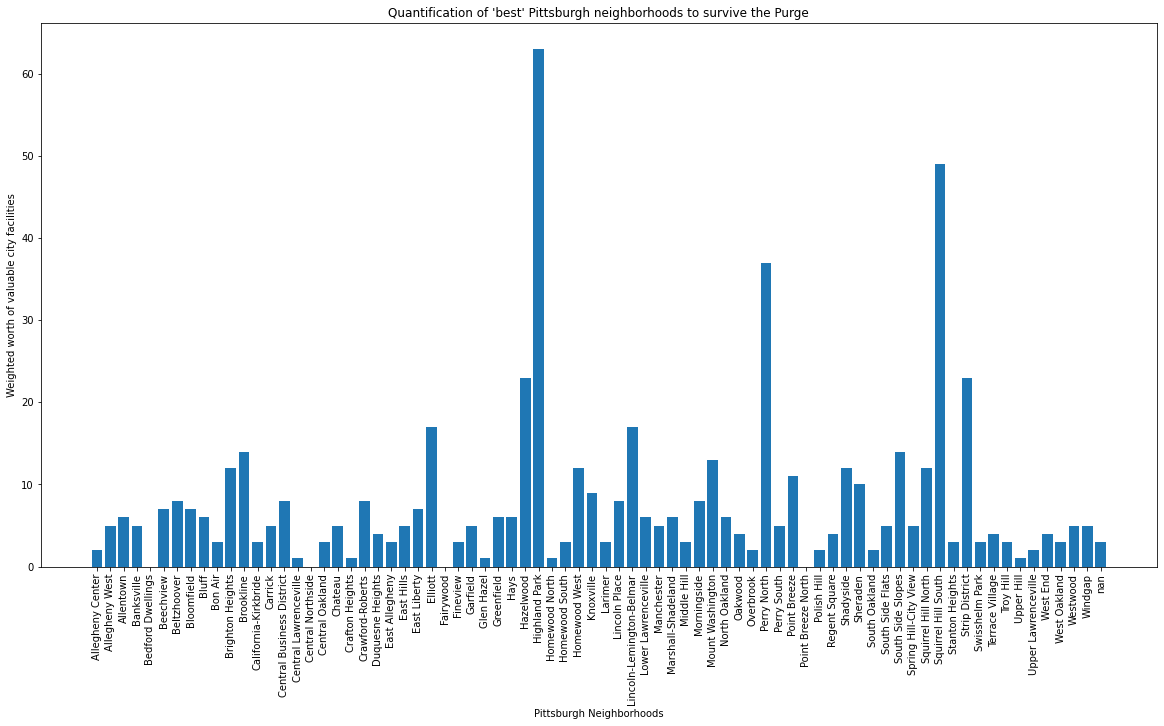

In [18]:
raw = get_worth_values(data)
names = list(raw.keys())
values = list(raw.values())

f, ax = plt.subplots(figsize=(20,10))
plt.bar(range(len(raw)), values, tick_label=names)
ax.tick_params(axis='x', labelrotation = 90)
plt.rcParams["axes.grid.axis"]="y"
plt.xlabel("Pittsburgh Neighborhoods")
plt.ylabel("Weighted worth of valuable city facilities")
plt.title("Quantification of 'best' Pittsburgh neighborhoods to survive the Purge")
plt.show()

---
# Conclusion
Based on my findings, the top 5 neighborhoods to survive the purge by the metric of having the most useful city facilities are:

|Rank|Neighborhood|Weighted worth (Higher is better)|
|---|---|---|
|1st|Highland Park|63|
|2nd|Squirrel Hill South|49|
|3rd|Perry North|37|
|4th|Hazelwood|23|
|5th|Strip District|23|

Although realistically, you'd only "hide" or in one government facility throughout the purge, in the dreaded scenario where your selected facility is compromised, being in a neighborhood with a higher number of safe city facilities (worth) means that there are close alternatives to run to as a back-up shelter:
## Reasoning
**The more safe facilities -> The denser the distribution of them -> The less distance between them -> Less time spent outside -> Higher chance of survival**


So if you want the highest chance of surviving the purge, Highland Park is the best, even having the most number of shelters at 30.